# Enunciado:

La base de datos “caso1a.xlsx” contiene el registro de 7261 clientes actuales de un supermercado con las siguientes variables:

•	Genero: género declarado por la persona
•	Estadocivil: estado civil declarado por la persona
•	Edad: Edad declarada por la persona
•	VIviendaPropia: información traída de una base externa sobre si la persona posee o no vivienda propia
•	Compra: el resultado de compra a una oferta de seguros de hogar (contenidos de la casa y reparaciones).

Desarrolle un modelo Naive Bayes para predecir la posible compra de futuros clientes de los que se posee la misma información.


In [ ]:
if (!require('readxl')) install.packages('readxl')
if (!require('caret')) install.packages('caret')
if (!require('MLmetrics')) install.packages('MLmetrics')
if (!require('e1071')) install.packages('e1071')

In [ ]:
library(readxl)
library(caret)
library(MLmetrics)
library(ROCR)
library(e1071)

Trabajaremos con el contexto del archivo de cartera de empresas. Para mantener los libros de nota modulares, repetiré aquí el contexto:

# ***  Naive Bayes (Bayes ingenuo) ***

# Data and business understanding

In [ ]:
caso1a<-read_excel("/content/caso1a.xlsx")
str(caso1a)
head(caso1a)

tibble [7,260 × 5] (S3: tbl_df/tbl/data.frame)
 $ Genero        : chr [1:7260] "FEMENINO" "FEMENINO" "MASCULINO" "FEMENINO" ...
 $ estadocivil   : chr [1:7260] "VIUDO" "CASADO" "SOLTERO" "SOLTERO" ...
 $ edad          : chr [1:7260] "51 - 60" "41 - 50" "41 - 50" "31 - 40" ...
 $ ViviendaPropia: chr [1:7260] "NO" "SI" "NO" "NO APLICA" ...
 $ compra        : chr [1:7260] "no" "no" "no" "si" ...


Genero,estadocivil,edad,ViviendaPropia,compra
<chr>,<chr>,<chr>,<chr>,<chr>
FEMENINO,VIUDO,51 - 60,NO,no
FEMENINO,CASADO,41 - 50,SI,no
MASCULINO,SOLTERO,41 - 50,NO,no
FEMENINO,SOLTERO,31 - 40,NO APLICA,si
MASCULINO,CASADO,41 - 50,SI,no
FEMENINO,VIUDO,51 - 60,SI,si


In [ ]:
#genero entrenamiento y validacion para cereal
set.seed(039)
sample <- sample.int(nrow(caso1a), floor(.5*nrow(caso1a)))
caso.train <- caso1a[sample, ]
caso.test <- caso1a[-sample, ]

# Modelling

La creación del modelo de Naive Bayes es relativamente simple, pues no existen hiperparámetros por sintonizar o parámetros a entrenar. Se trata simplemente de calcular las probabilidades de la categoría a predecir a partir de las categorías de las predictoras, suponiendo independencia entre ellas usando el Teorema de Bayes.

In [ ]:
naivetest<-naiveBayes(caso.train$compra~.,caso.train)
head(naivetest)

$apriori
Y
  no   si 
2404 1226 

$tables
$tables$Genero
    Genero
Y     FEMENINO MASCULINO
  no 0.5166389 0.4833611
  si 0.3882545 0.6117455

$tables$estadocivil
    estadocivil
Y         CASADO  DIVORCIADO    SEPARADO     SOLTERO  UNIÓN LIBR       VIUDO
  no 0.205074875 0.008319468 0.014559068 0.730449251 0.031613977 0.009983361
  si 0.432300163 0.012234910 0.021207178 0.505709625 0.023654160 0.004893964

$tables$edadcat
    edadcat
Y         0 - 17     18 - 22     23 - 30     31 - 40     41 - 50     51 - 60
  no 0.002754821 0.011478421 0.146005510 0.405417815 0.191000918 0.121671258
  si 0.000000000 0.005054760 0.058972199 0.189553496 0.403538332 0.271272115
    edadcat
Y        61 - 70     71 - 80
  no 0.089531680 0.032139578
  si 0.053074979 0.018534120

$tables$ViviendaPropia
    ViviendaPropia
Y           NO NO APLICA        SI
  no 0.5158070 0.1580699 0.3261231
  si 0.4738989 0.1003263 0.4257749


$levels
[1] "no" "si"

$isnumeric
        Genero    estadocivil        edadcat V

Un resultado a observar son las probabilidades a priori, que corresponden simplemente a las tasas base de las categorías a predecir. El segundo resultado a observar son** las probabilidades marginales del predictor dada la categoría a predecir.**

In [ ]:
#tasas base
naivetest$apriori

Y
  no   si 
2404 1226 

In [ ]:
#probabilidades marginales
naivetest$tables$Genero

    Genero
Y     FEMENINO MASCULINO
  no 0.5166389 0.4833611
  si 0.3882545 0.6117455

In [ ]:
naivetest$tables$edadcat


    edadcat
Y         0 - 17     18 - 22     23 - 30     31 - 40     41 - 50     51 - 60
  no 0.002754821 0.011478421 0.146005510 0.405417815 0.191000918 0.121671258
  si 0.000000000 0.005054760 0.058972199 0.189553496 0.403538332 0.271272115
    edadcat
Y        61 - 70     71 - 80
  no 0.089531680 0.032139578
  si 0.053074979 0.018534120

In [ ]:
naivetest$tables$estadocivil


    estadocivil
Y         CASADO  DIVORCIADO    SEPARADO     SOLTERO  UNIÓN LIBR       VIUDO
  no 0.205074875 0.008319468 0.014559068 0.730449251 0.031613977 0.009983361
  si 0.432300163 0.012234910 0.021207178 0.505709625 0.023654160 0.004893964

In [ ]:
naivetest$tables$ViviendaPropia

    ViviendaPropia
Y           NO NO APLICA        SI
  no 0.5158070 0.1580699 0.3261231
  si 0.4738989 0.1003263 0.4257749

La primera tabla nos permite ver una base de datos bastante balanceada. Las siguientes tablas permiten ver qué característica individual parece discriminar mejor el desayuno elegido.


Por ejemplo, dado que se consume barrita de desayuno hay una mayor probabilidad de que sea mujer, o dado que se consume avena hay una buena probabilidad de que se trate de una persona de más de 42 años, particularmente los mayores de 60.

## Evaluation

Creamos el objeto de predicción que nos permite ver el desempeño en la base de datos de validación

In [ ]:
# el modelo sintonizado

prednaiveprob<-predict(naivetest, caso.test, type="raw")


In [ ]:
prednaiveprob<-ifelse(prednaiveprob$X1 > 0.5, "no", "si")


ERROR: Error in prednaiveprob$X1: $ operator is invalid for atomic vectors


In [ ]:
prednaiveprob<-predict(naivetest, caso.test, type="raw")
head(prednaiveprob)


no,si
0.7221029,0.27789711
0.3097446,0.69025540
0.9270081,0.07299188
0.2103945,0.78960553
0.6464663,0.35353371
0.9270081,0.07299188


# 1.	(12) Dentro de su modelo, ensaye 3 valores del umbral de probabilidad, para decidir si una persona va a realizar una compra de un seguro de hogar.  ¿Cuál valor ofrece el mejor desempeño?



In [ ]:
 prednaive <- ifelse(prednaiveprob[, "si"] > 0.0
 , "si", "no")
 conf<-confusionMatrix(as.factor(prednaive),
                          caso.test$compra, positive = "si")
conf$table
conf$byClass

Warning message in confusionMatrix.default(as.factor(prednaive), caso.test$compra, :
“Levels are not in the same order for reference and data. Refactoring data to match.”


          Reference
Prediction   no   si
        no    0    0
        si 2467 1163

Sensitivity          Specificity       Pos Pred Value 
           1.0000000            0.0000000            0.3203857 
      Neg Pred Value            Precision               Recall 
                 NaN            0.3203857            1.0000000 
                  F1           Prevalence       Detection Rate 
           0.4852910            0.3203857            0.3203857 
Detection Prevalence    Balanced Accuracy 
           1.0000000            0.5000000

In [ ]:
prednaive <- ifelse(prednaiveprob[, "si"] > 0.75, "si", "no")
 conf<-confusionMatrix(as.factor(prednaive),
                          caso.test$compra, positive = "si")
conf$table
conf$byClass

          Reference
Prediction   no   si
        no 2398 1019
        si   69  144

Sensitivity          Specificity       Pos Pred Value 
          0.12381771           0.97203081           0.67605634 
      Neg Pred Value            Precision               Recall 
          0.70178519           0.67605634           0.12381771 
                  F1           Prevalence       Detection Rate 
          0.20930233           0.32038567           0.03966942 
Detection Prevalence    Balanced Accuracy 
          0.05867769           0.54792426

In [ ]:
prednaive <- ifelse(prednaiveprob[, "si"] > 0.3, "si", "no")
 conf<-confusionMatrix(as.factor(prednaive),
                          caso.test$compra, positive = "si")
conf$table
conf$byClass

          Reference
Prediction   no   si
        no 1524  291
        si  943  872

Sensitivity          Specificity       Pos Pred Value 
           0.7497850            0.6177544            0.4804408 
      Neg Pred Value            Precision               Recall 
           0.8396694            0.4804408            0.7497850 
                  F1           Prevalence       Detection Rate 
           0.5856279            0.3203857            0.2402204 
Detection Prevalence    Balanced Accuracy 
           0.5000000            0.6837697

## Conclusión

Para este modelo el mejor umbral es de 0.3 ya que da el mejor accuracy es de 0.683

# CURVA ROC – AUC

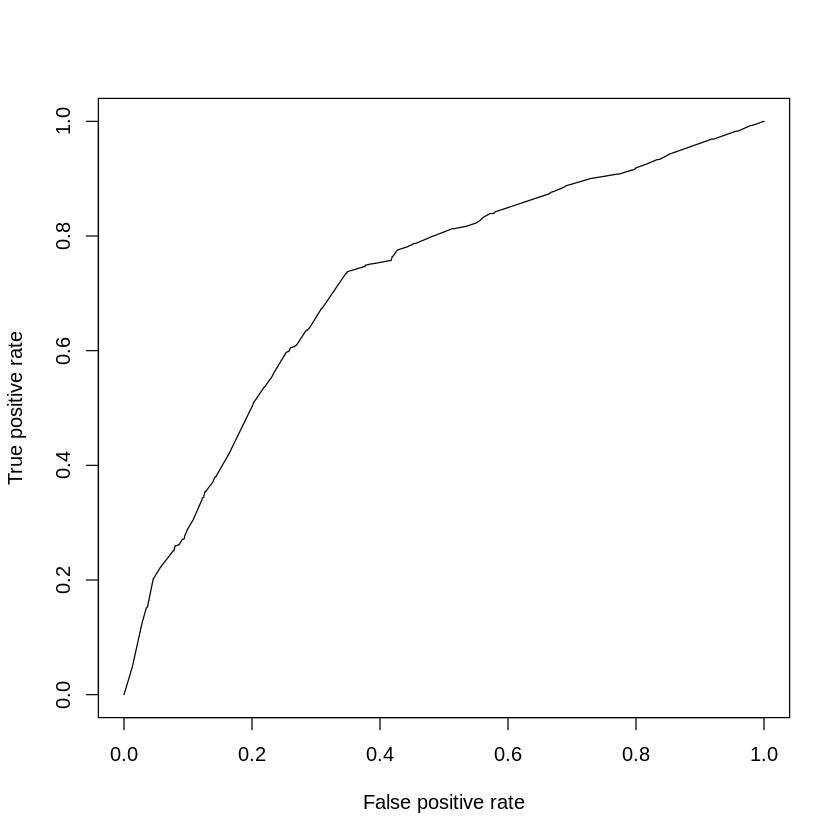

In [ ]:
#crear objeto de predicciones
pr<-prediction(prednaiveprob[, "si"],caso.test$compra)
#creacion del objeto de la curva
curvaROC<-performance(pr,measure="tpr",x.measure="fpr")
#grafico de la curva
plot(curvaROC)


